In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Value:
    def __init__(self, data, _children=(), _op='', label='', grad=0):
        self.data = data
        self.grad = grad
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f'Value(data={self.data})'
    
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __sub__(self, other):
        return Value(self.data - other.data, (self, other), '-')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    
    def __truediv__(self, other):
        return Value(self.data / other.data, (self, other), '/')


In [29]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
d = a*b; d.label = 'd' 
e = d + c; e.label = 'e'
f = Value(-2.0, label='f')
L = e * f; L.label = 'L'
L

Value(data=-8.0)

In [30]:
import graphviz

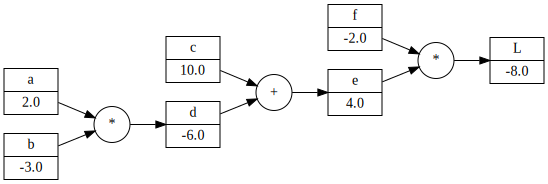

In [46]:
def build_graph(root):
    g = graphviz.Digraph('Computational Graph', node_attr={'shape': 'record'})
    
    g.graph_attr['rankdir'] = 'LR'
    def recur(node):
        if not node:
            return
        parents = node._prev
        if not parents:
            return
        child_label = node.label
        child_op = node._op
        child_data = node.data
        op_label = f'{child_op}_{child_label}'
        g.node(child_label, f'<f0>{child_label}|<f1>{child_data}')
        g.node(op_label, f'{child_op}', shape='circle')
        g.edge(op_label, child_label)
        for p in parents:
            g.node(p.label, f'{p.label} | { p.data}')
            g.edge(p.label, op_label)
            recur(p)
    recur(root)
    return g

build_graph(L)